---
title: Improve Model's Prediction power using Regularization
author: Aman Pandey
date: "03/20/2023"
description: Different ways to increase the model's prediction power using different regularization Techniques
format: 
  html:
    code-fold: true
jupyter: python3
editor: visual
categories: [deep-learning]
---

# Regularization
 A central problem in machine learning is how to make an algorithm that will perform well not just on the training data, but also on new inputs. The great `OverFitting Problem`.
 
  Many strategies used in machine learning are explicitly designed to reduce the test error, possibly at the expense of increased training error. These strategies are known collectively as regularization.

  One of the easiet to say but harder to do things is to increase the amount of training data.

Regularization increases training error but reduces generalization error hence more no of epochs are needed to get the desired result. Regularization helps to reduce overfitting of the model.

There are many regularization techniques used some but extra term in objective function and some but extra constraint on the model.

 1. L1/L2 regularizers
 2. DropOut
 3. Label Smoothing
 4. Data Augmentation
 5. Early Stopping
 6. Weight Clipping and Gradient Clipping
 8. Pruning
 10. Normalization
 


## L1/L2 Regularizers
L1 and L2 regularizers are some time known as weight decay.

L1 Regularization works by adding an l1 norm to the cost function.

$$
L1\ Norm : 
||X||_1 = \sum_i |x_i|
$$
L2 Regularization works by adding an l2 norm to the cost function. 

$$
L2\ Norm : 
||X||_2 = \sqrt {\sum_i |x_i^2|}
$$

The idea behind l1 and l2 norm is smaller weight generalizes the model better so both of these norm perform some kind of weight decay.

### L2 regularization 
$$
    C = any\ loss\ function  + \frac{\lambda}{2n}\sum w^2
$$
    
Here λ is a regularization parameter and n is the size of training data w is the weight.we are adding a sum of squares of all weights to the cost function which is scaled by λ/2n where λ > 0.

The intitution behind the l2 reguarization is to make it so the network prefers to learn small weights. Large weights will only be allowed if they considerably improve the first part of the cost function. 

Put another way, regularization can be viewed as a way of compromising between finding small weights and minimizing the original cost function. 

The relative importance of the two elements of the compromise depends on the value of λ: when λ is small we prefer to minimize the original cost function, but when λ is large we prefer small weights.

Updating weight formulae while backprop
$$
w = w - {lr} \frac{\partial C}{\partial w} - \frac {{lr} \lambda} {n} w
$$

$$
w = \left( 1 - \frac{{lr}\lambda } {n} \right) w - {lr} \frac{\partial C}{\partial w} 
$$

Here 
$$
\left( 1 - \frac{{lr} \lambda } {n} \right)
$$
is the rescaling factor for weights or the weight decay factor.For very small λ value it is allowing big weights and if λ value is big it is penealizing the weights.

Why is this going on? Heuristically, if the cost function is unregularized, then the length of the weight vector is likely to grow, all other things being equal. Over time this can lead to the weight vector being very large indeed. This can cause the weight vector to get stuck pointing in more or less the same direction, since changes due to gradient descent only make tiny changes to the direction, when the length is long. I believe this phenomenon is making it hard for our learning algorithm to properly explore the weight space, and consequently harder to find good minima of the cost function.



### L1 regularization 
$$
C = any\ loss\ function  + \frac{\lambda}{n}\sum_w |w|
$$

L1 regularization is similar to l2 just the norm formulae changes from sum of squares to absolute value.

Updating weight formulae while backprop
$$
w = w - {lr} \frac{\partial C}{\partial w} - \frac {{lr} \lambda} {n} sign(w)
$$

sign(w) is just the sign of the weight vector +1 for positive weights and -1 for negative weights

#### Comparing L1 and L2 
In both expressions the effect of regularization is to shrink the weights. This accords with our intuition that both kinds of regularization penalize large weights. But the way the weights shrink is different. 

In L1 regularization, the weights shrink by a constant amount toward 0. 

In L2 regularization, the weights shrink by an amount which is proportional to w. And so when a particular weight has a large magnitude, |w|, L1 regularization shrinks the weight much less than L2 regularization does.

By contrast, when |w| is small, L1 regularization shrinks the weight much more than L2 regularization. The net result is that L1 regularization tends to concentrate the weight of the network in a relatively small number of high-importance connections, while the other weights are driven toward zero.

Hence L1 regularization makes the **`Network Spare`**.

## Dropout 
Dropout is another regularization techniques which is very simple to understand.

![](images/dropout.gif)

So it takes a probability p and based on the value of p it randomly disables that percentage of neuron.

For example if the dropout value is 0.3 on a layer. It will disable 30% neuron in the layer i.e zero the value of those neuron.

While training with every batch a different set on neurons are disabled which is completely random.

So why does dropout increases the robustness of the model?
Heuristically, when we dropout different sets of neurons, it's rather like we're training different neural networks. And so the dropout procedure is like averaging the effects of a very large number of different networks. The different networks will overfit in different ways, and so, hopefully, the net effect of dropout will be to reduce overfitting.

For example In cnn if the model is trained on dogs vs cats example and few particular neurons having higher weight, everytime the model witnesses the whiskers in the image it activates those neurons and we get cat. But what if those whiskers are no there then model fails significantly. so dropout forces the model to learn more attributes of the training data while training. 

when p = 0.5

By repeating dropout over and over, our network will learn a set of weights and biases. Of course, those weights and biases will have been learnt under conditions in which half the hidden neurons were dropped out. When we actually run the full network that means that twice as many hidden neurons will be active. To compensate for that, we halve the weights outgoing from the hidden neurons.

if we Pytorch implementation of Dropout their , the outputs are scaled by a factor of $$ 1/(1-p)​$$ during training. This means that during evaluation the module simply computes an identity function.

There is also `DropConnect` which is on similar lines as `Dropout`

#### DropConnect

![](images/dropconnect.png)


#### Dropout

![](images/dropoutff.png)



## Label Smoothing

When we apply the cross-entropy loss to a classification task, we're expecting true labels to have 1, while the others 0. In other words, we have no doubts that the true labels are true, and the others are not. Is that always true? Maybe not. Many manual annotations are the results of multiple participants. They might have different criteria. They might make some mistakes. They are human, after all. As a result, the ground truth labels we have had perfect beliefs on are possible wrong.

The impact of this on model is 
First, it may result in over-fitting:  if the  model  learns  to  assign  full  probability  to  the  ground truth label for each training example, it is not guaranteed to generalize.  Second, it encourages the differences between the largest  logit  and  all  others  to  become  large,  and  this, combined with the bounded gradient reduces the ability of the model to adapt.  Intuitively, this happens because the model becomes too confident about its predictions.

One possibile solution to this is to relax our confidence on the labels. For instance, we can slighly lower the loss target values from 1 to, say, 0.9. And naturally we increase the target value of 0 for the others slightly as such. This idea is called label smoothing.

[Check the result of imagenet model after applying on imagenet](https://arxiv.org/pdf/1512.00567.pdf)

[Pytorch Supports it in Cross Entropy Loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)

# Data Augmentation

In [ ]:
# torch installation
#generic
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL
from pathlib import Path
from tqdm import tqdm
from IPython.display import Image
#torch Dependencies
import torch
from torchvision import datasets , transforms
from torch.utils.data import Dataset , DataLoader
import torchvision


#setting cuda for gpu in torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


### what is Data Augmentation ?
1. Data Augmentation is a technique to add variance in data so that the model generalizes better.
            
2. We Perform data augmentation more specifically image augmentation on Image data for CNNs through simple techniques, such as cropping, rotating, horizontally flip or vertically flip, swapping the channels etc.

![](https://cdn-images-1.medium.com/max/2600/1*bqNylp7FcqIBWg0DrcimUw.png)

### Why do we Need Image Augmentation

##### Suppose you have trained a DL model for Cats and Dogs Classification and all the images are picture perfect i.e the object is in the center and in focus and Images are taken in daylight conditions, therefore your model works fine .

##### Let's discuss three use cases in the context of the above problem.

1. what happens when model sees a half cropped cat image or the object is in not in center and out of focus.
2. What if the model gets a low light image of dog.
3. what if your training image is size is less and it contains certain biases in the images with low variance. For example all the cats photos contains very less background i.e image is zoomed in and model gets an image of cat sitting in a park where the images contains more background.   

##### In all above cases the model will goof up, It will spit out wrong results.

### What is the solution to all above problems
##### Image Augmentation
  1. Augmentation is also a form of adding prior knowledge to a model; e.g. images are rotated, which you know does not change the class label. Increasing training data (as with augmentation) decreases a model's variance. Regularization also decreases a model's variance. They do so in different ways, but ultimately both decrease regularization error.
  
  
  2. A convolutional neural network that can robustly classify objects even if its placed in different orientations is said to have the property called invariance. More specifically, a CNN can be invariant to translation, viewpoint, size or illumination (Or a combination of the above).
  
  
  3. With Data Augmentation you make the model robust even when training set is small by giving inputs of images accounting for most different situations. ex:- Different Lighting conditions. 
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSTUUnxINkVeJLQVbs8JjTlStNXmT7fW5dfQ3428UZ_yb8JouyS)


###### The above Augmentation is sign board for self driving cars.
###### You can realize the neccesity of image Augmenation from this image as the self driving car should able to recognize the stop sign board in any case

![](https://cdn-images-1.medium.com/max/1600/1*_mgTLhXwWGDEgz_2C7dRDg.png)

###### what are the various augmentation techniques to be performed on different kinds of data
![](https://i.ytimg.com/vi/Kmypbz3wVko/maxresdefault.jpg)




### Do we need Augmentation If training data set is huge?

### Data Augmentation in Pytorch and visualization

1. Pytorch and Keras support a basic set of image augmentation techniques.


2. For more Advance Augmentation refer these libraries [ImgAug](https://imgaug.readthedocs.io/en/latest/), [albumentation](https://github.com/albu/albumentations) and [Augmentor](https://github.com/mdbloice/Augmentor).


3. They  support a wide range of augmentation techniques, allows to easily combine these and to execute them in random order or on multiple CPU cores, has a simple yet powerful stochastic interface and can not only augment images, but also keypoints/landmarks, bounding boxes, heatmaps and segmentation maps.


In [24]:
#Transforms are common image transformations. They can be chained together using Compose.
# pytorch gives many transformation on PIL image so if you get a tensor by default first convert it to PIL image then apply transformation 
# and then convert back to tensor or else it can be used directly
transform = transforms.Compose([transforms.RandomRotation((0,5),resample = PIL.Image.NEAREST), 
                                 transforms.ColorJitter(brightness=0.5, contrast=0, saturation=0, hue=0),
                                 transforms.RandomHorizontalFlip(p=0.5),
                                 transforms.CenterCrop(size=26),
                                transforms.ToTensor()])

In [26]:
trainSet = datasets.CIFAR10(root="./data/pytorch" , train=True,download=True , transform =transforms.ToTensor() ) #This returns the dataset 
trainLoader = DataLoader(trainSet , batch_size=8) # Data loader. Combines a dataset and a sampler, and provides single- or multi-process iterators over the dataset.
trainSetAug = datasets.CIFAR10(root="./data/pytorch" , train=True,download=True,transform=transform) #This returns the dataset 
trainLoaderAug = DataLoader(trainSetAug , batch_size=8) # Data loader. Combines a dataset and a sampler, and provides single- or multi-process iterators over the dataset.
classes = ('plane', 'car', 'bird', 'cat' , 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')# cifar 10 classes

Files already downloaded and verified
Files already downloaded and verified


In [21]:
def denormalize(image):
  #because pytorch takes data in C * H * W  order we need to convert to H * W* C for visualizing in pytorch
  image = image.permute(1,2,0) # it transposes the dimensions
  return image
  

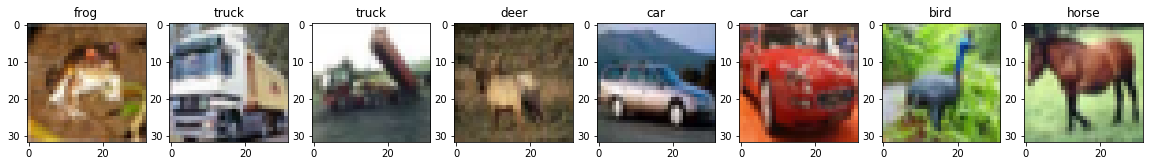

In [36]:
#As we can see we have given batch size of 8 so
# visualizing the image
images , labels = next(iter(trainLoader))
nrows=1
ncols = len(images)//nrows 
plt.figure(figsize=(20,7))
for i in range(len(images)):
  plt.subplot(nrows,ncols,i+1)
  plt.grid(False)
  plt.imshow(denormalize(images[i]))
  plt.title(classes[labels[i]])
plt.show()

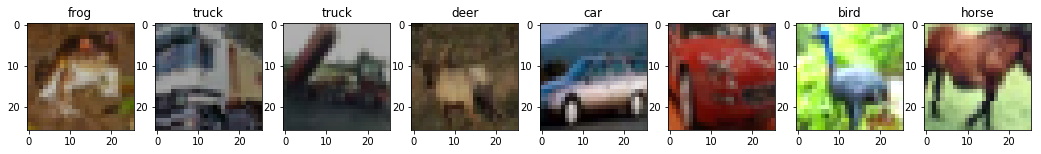

In [38]:
images , labels = next(iter(trainLoaderAug))
nrows=1
ncols = len(images)//nrows 
plt.figure(figsize=(18,7))
for i in range(len(images)):
  plt.subplot(nrows,ncols,i+1)
  plt.grid(False)
  plt.imshow(denormalize(images[i]))
  plt.title(classes[labels[i]])
plt.show()

### Let's see something different

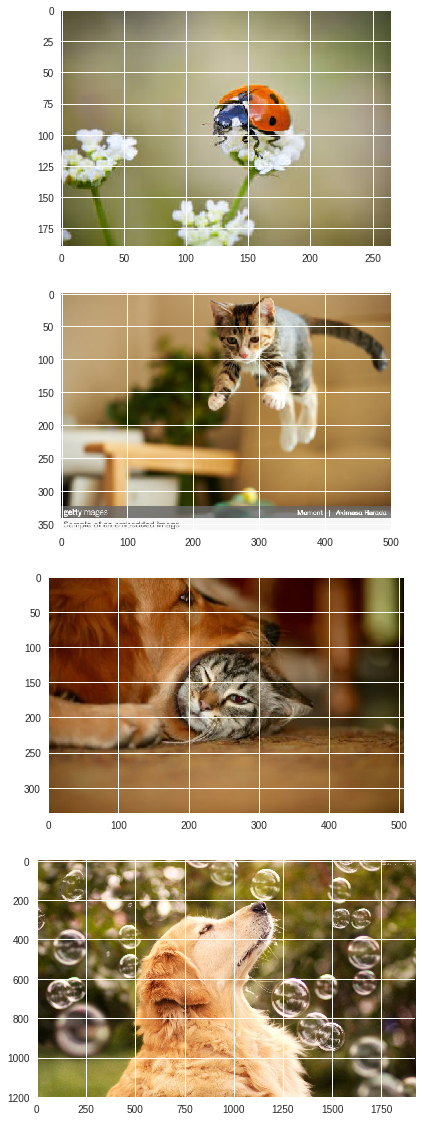

In [6]:
# make your data 
from pathlib import Path
import requests

def download_images(root_dir , list_of_images):
  for index , image_url in enumerate(list_of_images):
    r = requests.get(image_url , stream=True)
    with open(root_dir/"{}.jpg".format(index) , "wb") as f:
      for chunks in r.iter_content(chunk_size=1024):
        if chunks:
          f.write(chunks)

list_of_images = [
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTEJpqf8laCz0tzwRVdQA-kVMkUorZqVtc9CvYsHvtHSjqb2v6",
    "https://www.gettyimages.in/gi-resources/images/Embed/new/embed2.jpg",
    "http://www.personal.ceu.hu/students/17/Marina_Tomovic/Images/955d4284905d149ea4967ff586e89b41.jpg",
    "https://d12m9erqbesehq.cloudfront.net/wp-content/uploads/sites/5150/2016/04/13100027/images-4.jpg",
]
root_dir = Path("my_data/train")
if not root_dir.exists():
  root_dir.mkdir(parents=True)
  
download_images(root_dir , list_of_images)
index=0
plt.figure(figsize=(20,20))
for i in datasets.ImageFolder(str(root_dir/"..")):
  index+=1
  plt.subplot(4,1 ,index)
  plt.imshow(i[0])      

#### Normalization

In [7]:
#Other important technique is normalization of image we do a channel wise normalization by subtracting the channel wise mean by standard deviation 
# we perform this to keep all the input images in similar range and thus getting a stable gradient
train_data = datasets.CIFAR10('./data/pytorch', train=True)
# use np.concatenate to stick all the images together to form a 1600000 X 32 X 3 array
x = np.concatenate([np.asarray(train_data[i][0]) for i in range(len(train_data))], axis=0)
# print(x)
print(x.shape)
# calculate the mean and std along the (0, 1) axe
mean = np.mean(x,axis=(0,1))
std=np.std(x,axis=(0,1))
print(mean , std)
mean , std = torch.tensor([0.485, 0.456, 0.406]),torch.tensor([0.229, 0.224, 0.225]) 


(1600000, 32, 3)
[125.30691805 122.95039414 113.86538318] [62.99321928 62.08870764 66.70489964]


In [ ]:
# The Updated transforms with normalization 
transform = transforms.Compose([transforms.RandomAffine((5,10), scale=(1,1.5) ,resample=PIL.Image.NEAREST),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean ,std)]) ## normalize
trainset = datasets.ImageFolder(str(root_dir/"..") , transform)
trainLoader = DataLoader(trainset , batch_size=4,shuffle=True)


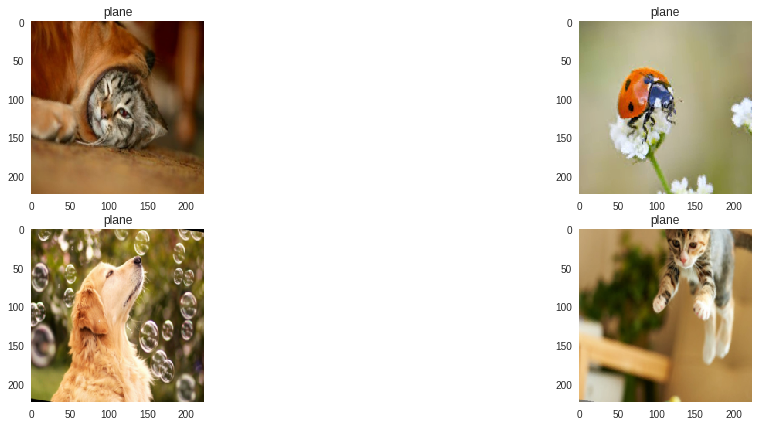

In [11]:
def denormalize(image):
  image = transforms.Normalize(-mean/std,1/std)(image) #denormalize
  image = image.permute(1,2,0) 
  image = torch.clamp(image,0,1)
  return image

data = next(iter(trainLoader))
images , labels = data
nrows=2
ncols = len(data[0])//nrows 
plt.figure(figsize=(18,7))
for i in range(len(images)):
  plt.subplot(nrows,ncols,i+1)
  plt.grid(False)
  plt.imshow(denormalize(images[i]))
  plt.title(classes[labels[i]])
plt.show()

##### So now that you have learnt Data Augmentation techniques.  The problem statement should be scrtunized well before applying any augmentation to the dataset.  Don't increase irrelevant data.

## Early Stopping

Monitor the model's performance on a validation set during training and stop when the performance starts degrading. This prevents the model from overfitting the training data.

Here you can look at the code to implement the same [link](https://pytorch.org/ignite/_modules/ignite/handlers/early_stopping.html#EarlyStopping)

##  Weight Clipping and Gradient Clipping
1. Limit the magnitude of weights in the network to prevent them from becoming too large. This can be achieved using techniques like weight clipping.
2. Limit the gradients during training to prevent exploding gradients. This is especially useful in recurrent neural networks (RNNs).

```python
opt = optim.SGD(model.parameters(), lr=0.1)
for i in range(1000):
    out = model(inputs)
    loss = loss_fn(out, labels)
    print(i, loss.item())
    opt.zero_grad()
    loss.backward()
    # standard way of clipping the gradient
    torch.nn.utils.clip_grad_norm_(model.parameters(), args.clip)
    
    # another way of doing it
    # https://pytorch.org/docs/stable/_modules/torch/nn/utils/clip_grad.html#clip_grad_value_
    for param in model.parameters():
        param.grad.clamp_(-1, 1)  # weight clipping in range of -1 to 1

    opt.step()
    with torch.no_grad():
        for param in model.parameters():
            param.clamp_(-1, 1)  # weight clipping in range of -1 to 1

```

##  Pruning

![](images/pruning.png)
Pruning is a technique that removes weights or biases (parameters) from a neural network model.
Now there are many ways of doing it based on different criteria and what the need is overall if done properly , makes the model training/inference fast, better generalization, resource friendly.

Follow few tutorials

 [Tutorial](https://pytorch.org/tutorials/intermediate/pruning_tutorial.html#global-pruning)
 
 [Doc](https://pytorch.org/docs/stable/nn.html#module-torch.nn.utils)

# Normalization and Standardization

Normalization is also a regularization technique where we equalize all the attributes of a model and bring them down to normal standard. So what actually is normal standard, let's see with a example. Suppose in the cnn model if some neuron is very active by having a high weight then all other neurons with small weight won't be able to contribute to model more so with normalization we bring down all the neurons to small scale.

#### Look at this image below: 
![](images/cnnfilter.jpg)
### There is something wrong with this image. 

#### Let's look at the greyscale version of this image to learn more. 
![](images/cnnfilter_bnw.png)
What is wrong here is, that the amplitudes of these kernels are not "similar", which means even though they have learnt what do do, their contribution would not be carried forward a lot. We need to normalize them.


#### This is the effect of normalization on these kernels:
![](images/cnnfilter_bnw_eql.png)

#### Normalization has now tried to equalize the kernels, i.e. pulled up the values.
 

#### Let's look at these in 3d. Remember the 3D component here is just for reference, and represent the amplitudes.

These are normal kernels:
![](images/ezgif-4-024a490477.gif)

#### These kernels are now "normalized":
![](images/ezgif-4-6ba4093f05.gif)


In statistics we perform standardization by calculting z-score
$$
z = \frac{x-\mu}{\sigma}
$$

In statistics we perform Normalization by various I am showing min max scaler ways
$$
z = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

![](images/bellcurve.jpg)

The special property of this new standarized data is **it has zero mean and one standard deviation**


`Note`:- Standardization and Normalization doesn't make a distribution a standard normal because there are just linear transformation. 


There are many normalization techniques but specially in CNNs we primarly use Batch norm which is based on the above described math.

### Batch Normalization


Batch normalization reduces the amount by what the hidden unit values shift around (covariance shift). To explain covariance shift, let’s have a deep network on cat detection. We train our data on only black cats’ images. So, if we now try to apply this network to data with colored cats, it is obvious; we’re not going to do well. The training set and the prediction set are both cats’ images but they differ a little bit. In other words, if an algorithm learned some X to Y mapping, and if the distribution of X changes, then we might need to retrain the learning algorithm by trying to align the distribution of X with the distribution of Y. ( Deeplearning.ai: Why Does Batch Norm Work? (C2W3L06))

Also, Covariance shift, in the context of batch normalization (BatchNorm), is phenomenon where the statistical properties of the input to a neural network's layer change as the network trains. Specifically, it refers to changes in the mean and variance of the input data distribution at different layers of a deep neural network during the training process.

Also, batch normalization allows each layer of a network to learn by itself a little bit more independently of other layers.

We can use higher learning rates because batch normalization makes sure that there’s no activation that’s gone really high or really low. And by that, things that previously couldn’t get to train, it will start to train.

It reduces overfitting because it has a slight regularization effects. Similar to dropout, it adds some noise to each hidden layer’s activations. Therefore, if we use batch normalization, we will use less dropout, which is a good thing because we are not going to lose a lot of information. However, we should not depend only on batch normalization for regularization; we should better use it together with dropout.


#### How it works?
So we use batch norm as layer before the activation layer which normalizies the data by subtracting the batch data with batch mean and then dividing by batch standard deviation.

After normalizing the layer the weights are shifted/scaled by some value for the next layer now what if the model wants to undo the normalization operation to decrease the loss, model should have some control of that, therefore we introduce two more learnable parameters gamma and beta.

Where gamma can be the standard deviation and beta the mean value to perform the denormalization operation


<img src ="images/batch_norm.png" width="50%" height="200">


###  [Weight Norm](https://arxiv.org/pdf/1602.07868.pdf)

BatchNorm: BatchNorm normalizes the activations of a layer by computing the mean and variance statistics within each mini-batch during training. It normalizes the activations of a layer based on the statistics of the current mini-batch.

WeightNorm: WeightNorm, on the other hand, normalizes the weights (parameters) of a neural network layer. It scales and normalizes the weights themselves, not the activations.


### Layer Norm
This is also a normalizing technique similar batch norm but it performs its operation on layers of the batch and used in RNNs.

![](images/weight_layer_norm.webp)


![](images/batch_layer.jpg)



Let's take an example of input size `(32,100,64,64)` where `32` is batch size `100` channel or feature and `64`, `64` is Height and width

Batch Norm happens across batch in dimension -> `0,2,3` we calculate mean, hence for `100` features we are left with `100` values we calculate mean across batches and features, i.e pick a channel for all `32` batches each of size `64`,`64` take the mean.

Layer Norm -> removes the dependecy on batch we take mean across dimension -> `1,2,3` hence for each image which has got `100` channels calculate a single value and finally we will left with `32` values, treat example independently.

Instance Norm -> takes the idea of layer norm and pushes it too much  we take mean across-> `0,1`, calculate mean per image per channel


#### Batch Norm for CNN, Layer Norm for RNN and Transformer Models.

## Thank you.